<a href="https://colab.research.google.com/github/hager2164/DL_tasks/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df["Geography"].value_counts()


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df , columns= ['Geography'] , prefix= ['Geography']  , drop_first=True)
df = pd.get_dummies(df , columns= ['Gender'] , prefix= ['Gender']  , drop_first=True)

In [15]:
X = df.drop(['Exited' , 'RowNumber' , 'Surname'], axis=1)

In [13]:
y = df["Exited"]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [16]:
X.isnull().sum()

,0
CustomerId,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Geography_Germany,0


In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = np.array(X_train)

In [20]:
X_test = np.array(X_test)

In [22]:
model = keras. models .Sequential ()
from tensorflow.keras.layers import Dense , Flatten
model.add(Dense(10 , activation='relu'))
model.add(Dense(8 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [24]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("ANN_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [26]:
#batch_size
history = model.fit (
    X_train , y_train ,epochs = 30
    , validation_split=0.1 , callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8682 - loss: 0.3271 - val_accuracy: 0.8700 - val_loss: 0.3266
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3423 - val_accuracy: 0.8662 - val_loss: 0.3272
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.3414 - val_accuracy: 0.8700 - val_loss: 0.3265
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3466 - val_accuracy: 0.8700 - val_loss: 0.3263
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3397 - val_accuracy: 0.8712 - val_loss: 0.3266
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8628 - loss: 0.3338 - val_accuracy: 0.8687 - val_loss: 0.3266
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3324 - val_accuracy: 0.8725 - val_loss: 0.3261
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3315 - val_accuracy: 0.

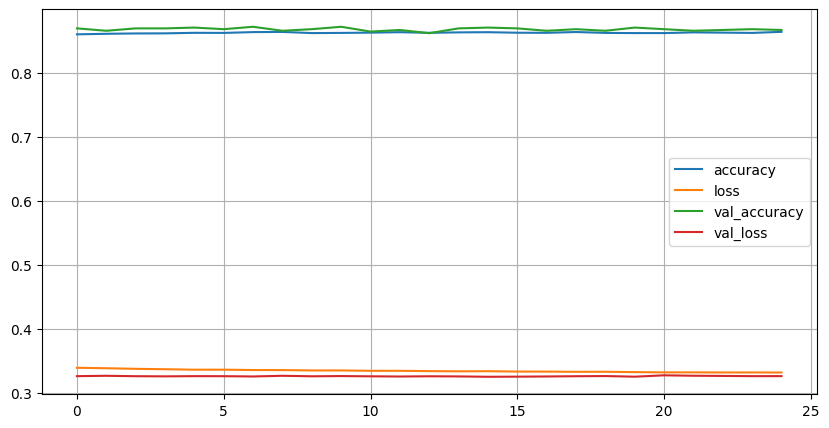

In [27]:
import matplotlib.pyplot as plt
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [28]:
model.evaluate(X_test , y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.3339


[0.34030044078826904, 0.859000027179718]

In [29]:
y_pred = np.round(model.predict(X_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [31]:
y_test = np.array(y_test).reshape(-1,1)


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)



array([[1515,   80],
       [ 202,  203]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

